# Linear Regression Interpretation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [3]:
chicks = pd.read_csv('../data/ChickWeight.csv')
chicks = chicks.drop([chicks.columns[0]], axis='columns')
chicks.sample(10)

,weight,Time,Chick,Diet
449,55,2,40,3
252,145,16,23,2
173,67,12,15,1
560,152,12,49,4
66,141,12,6,1
352,41,0,32,3
104,100,18,9,1
295,73,6,27,2
265,72,18,24,2
351,256,21,31,3


In [4]:
chicks.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


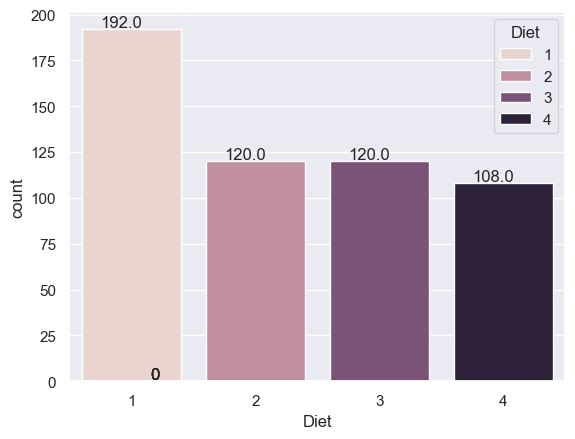

In [64]:
ax = sns.countplot(x="Diet", data=chicks,hue="Diet")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

<Axes: xlabel='Time', ylabel='weight'>

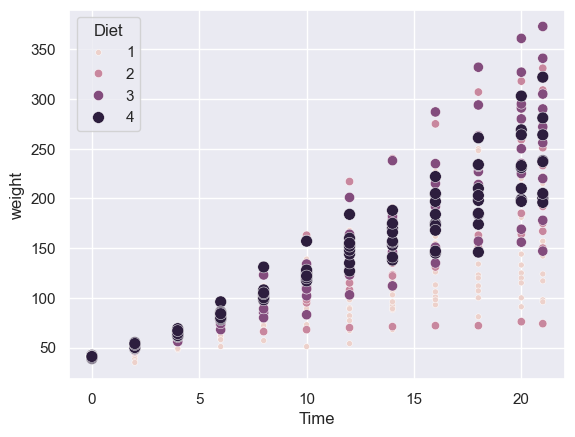

In [8]:
sns.scatterplot(x='Time',y='weight', hue="Diet", size='Diet', data=chicks)


In [9]:
chicks_pivot = chicks.pivot_table(
    values="weight",
    index=['Chick', 'Diet'],
    columns='Time')
chicks_pivot.head(10)

,Time,0,2,4,6,8,10,12,14,16,18,20,21
Chick,Diet,,,,,,,,,,,,
1,1,42.0,51.0,59.0,64.0,76.0,93.0,106.0,125.0,149.0,171.0,199.0,205.0
2,1,40.0,49.0,58.0,72.0,84.0,103.0,122.0,138.0,162.0,187.0,209.0,215.0
3,1,43.0,39.0,55.0,67.0,84.0,99.0,115.0,138.0,163.0,187.0,198.0,202.0
4,1,42.0,49.0,56.0,67.0,74.0,87.0,102.0,108.0,136.0,154.0,160.0,157.0
5,1,41.0,42.0,48.0,60.0,79.0,106.0,141.0,164.0,197.0,199.0,220.0,223.0
6,1,41.0,49.0,59.0,74.0,97.0,124.0,141.0,148.0,155.0,160.0,160.0,157.0
7,1,41.0,49.0,57.0,71.0,89.0,112.0,146.0,174.0,218.0,250.0,288.0,305.0
8,1,42.0,50.0,61.0,71.0,84.0,93.0,110.0,116.0,126.0,134.0,125.0,NaN
9,1,42.0,51.0,59.0,68.0,85.0,96.0,90.0,92.0,93.0,100.0,100.0,98.0


In [11]:
chicks_pivot = chicks_pivot.dropna()

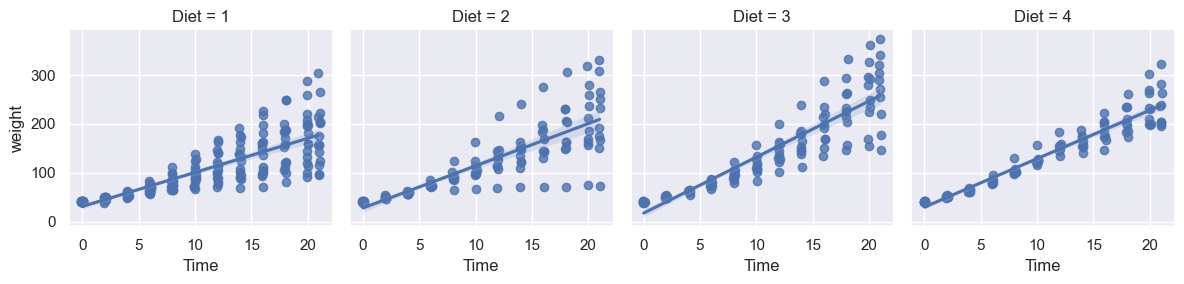

In [58]:
chicks = chicks_pivot.stack().reset_index(name='weight')
g = sns.FacetGrid(chicks, col="Diet", margin_titles=True)
g.map(sns.regplot, "Time", "weight",fit_reg=True, x_jitter=.1)

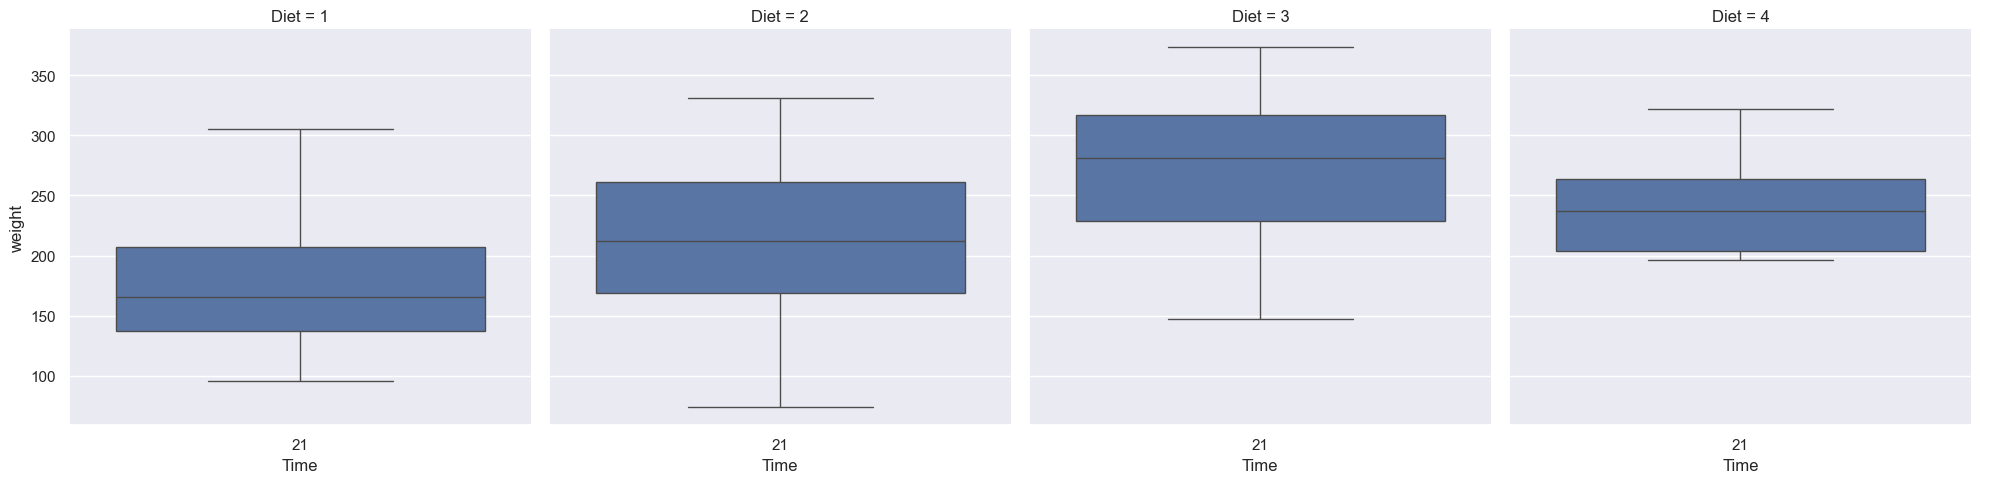

In [57]:
sns.catplot(
    x="Time",
    y="weight",
    col="Diet",
    data=chicks.query("Time>20"),
    kind="box", col_wrap=4)

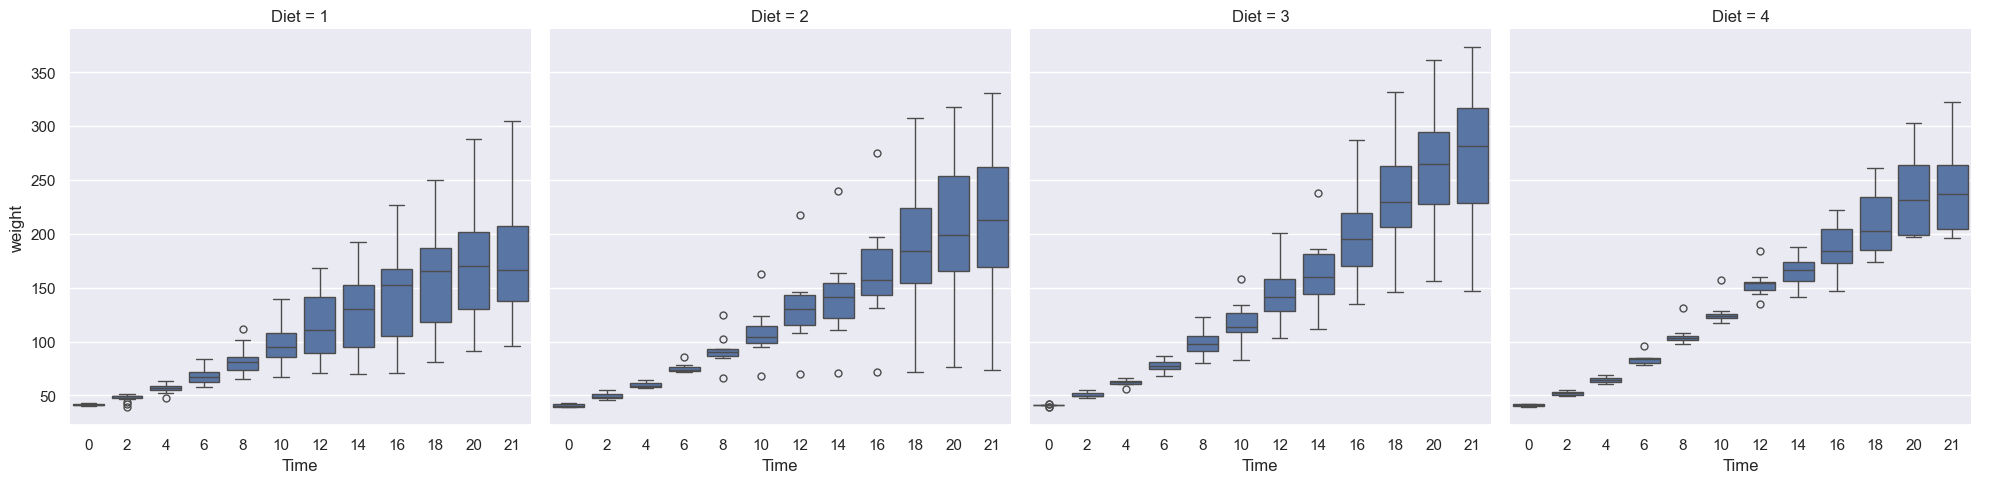

In [14]:
sns.catplot(
    x="Time",
    y="weight",
    col="Diet",
    data=chicks,
    kind="box", col_wrap=4)

In [15]:
chicks

,Chick,Diet,Time,weight
0,1,1,0,42.0
1,1,1,2,51.0
2,1,1,4,59.0
3,1,1,6,64.0
4,1,1,8,76.0
...,...,...,...,...
535,50,4,14,175.0
536,50,4,16,205.0
537,50,4,18,234.0
538,50,4,20,264.0


In [60]:
m1 = smf.ols(
    #'weight ~ C(Diet) + C(Time)+ C(Diet)*C(Time)',
    'weight ~ C(Diet) + C(Time)',
    data=chicks
    ).fit()

In [61]:
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,23.7536,5.799,4.096,0.000,12.362,35.145
C(Diet)[T.2],14.9760,4.219,3.549,0.000,6.687,23.265
C(Diet)[T.3],35.3094,4.219,8.369,0.000,27.021,43.598
C(Diet)[T.4],30.6927,4.361,7.038,0.000,22.125,39.260
C(Time)[T.2],8.5111,7.644,1.113,0.266,-6.505,23.527
C(Time)[T.4],19.0889,7.644,2.497,0.013,4.073,34.105
C(Time)[T.6],33.8000,7.644,4.422,0.000,18.784,48.816
C(Time)[T.8],51.3556,7.644,6.719,0.000,36.339,66.372
C(Time)[T.10],69.0222,7.644,9.030,0.000,54.006,84.039
C(Time)[T.12],91.7111,7.644,11.998,0.000,76.695,106.727


In [42]:
m1.summary().tables[0]

Dep. Variable:,weight,R-squared:,0.753
Model:,OLS,Adj. R-squared:,0.746
Method:,Least Squares,F-statistic:,114.0
Date:,"Mon, 26 Jan 2026",Prob (F-statistic):,5.68e-149
Time:,18:03:54,Log-Likelihood:,-2697.6
No. Observations:,540,AIC:,5425.
Df Residuals:,525,BIC:,5490.
Df Model:,14,,
Covariance Type:,nonrobust,,


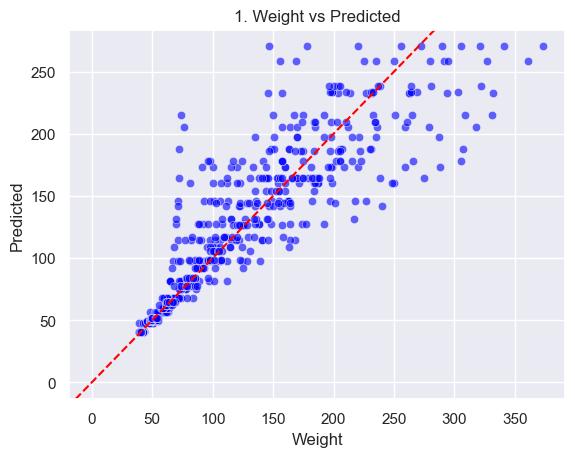

In [49]:
# Use subplots() instead of plot()
fig, ax = plt.subplots()

sns.scatterplot(
    x=chicks['weight'],
    y=m1.fittedvalues,
    color='blue',
    alpha=0.6,
    ax=ax
)

ax.axline((0, 0), slope=1, color='red', linestyle='--', label='Identity Line ($y=x$)')

ax.set_title('1. Weight vs Predicted')
ax.set_xlabel('Weight')
ax.set_ylabel('Predicted')

plt.show()

<Axes: ylabel='Count'>

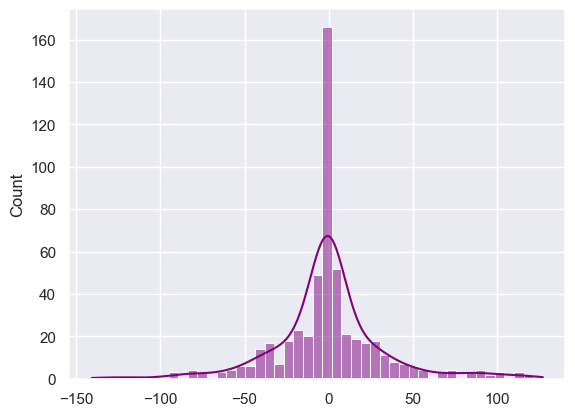

In [50]:
residuals = m1.resid
sns.histplot(residuals, kde=True, color='purple')

# 2. BikerPro

In [67]:
bikerpro = pd.read_csv(
    '../data/SeoulBikeData.csv',
    encoding = "ISO-8859-1"
    )

In [68]:
raw_columns = list(bikerpro.columns)
raw_columns

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [70]:
clean_columns = [
    x.lower().\
        replace("(°c)", '').\
        replace("(%)", '').\
        replace(" (m/s)", '').\
        replace(" (10m)", '').\
        replace(" (mj/m2)", '').\
        replace("(mm)", '').\
        replace(" (cm)", '').\
        replace(" ", '_')
    for x in bikerpro.columns
    ]

bikerpro.columns = clean_columns

In [71]:
bikerpro['date'] = pd.to_datetime(bikerpro['date'], format='%d/%m/%Y')

In [76]:
bikerpro['weekday'] = bikerpro['date'].dt.weekday
bikerpro['is_weekend'] = np.where(bikerpro['date'].dt.weekday> 4,1,0)

In [74]:
bikerpro.sample(5)

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
1132,2018-01-17,55,4,3.0,68,0.5,322,-2.3,0.00,0.0,0.0,Winter,No Holiday,Yes
5677,2018-07-25,783,13,32.3,56,3.0,1504,22.3,1.74,0.0,0.0,Summer,No Holiday,Yes
4169,2018-05-23,2069,17,22.4,39,3.2,1943,7.7,1.90,0.0,0.0,Spring,No Holiday,Yes
2219,2018-03-03,431,11,8.1,21,2.1,1738,-12.9,2.15,0.0,0.0,Spring,No Holiday,Yes
57,2017-12-03,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes


In [ ]:
# Columnas del clima
weather_cols = [
    'temperature', 
    'humidity',
    'wind_speed',
    'visibility',
    'dew_point_temperature',
    'solar_radiation',
    'rainfall',
    'snowfall'
    ]

seasons_cols = ['seasons']

time_cols = ['hour']

# columna objectivo a predecir
target_col = ['rented_bike_count']

In [99]:
m2 = smf.ols(
    'rented_bike_count ~ temperature + humidity + snowfall + C(hour) + C(weekday) + C(is_weekend) + temperature*C(hour) + C(seasons)+ C(holiday)+ C(functioning_day)',
    data=bikerpro
    ).fit()

In [98]:
m2.summary().tables[0]

Dep. Variable:,rented_bike_count,R-squared:,0.716
Model:,OLS,Adj. R-squared:,0.714
Method:,Least Squares,F-statistic:,365.8
Date:,"Mon, 26 Jan 2026",Prob (F-statistic):,0.00
Time:,18:33:21,Log-Likelihood:,-63584.
No. Observations:,8760,AIC:,1.273e+05
Df Residuals:,8699,BIC:,1.277e+05
Df Model:,60,,
Covariance Type:,nonrobust,,


In [100]:
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-51.1249,41.243,-1.240,0.215,-131.971,29.722
C(hour)[T.1],-29.9469,35.726,-0.838,0.402,-99.978,40.084
C(hour)[T.2],-85.2902,35.474,-2.404,0.016,-154.827,-15.753
C(hour)[T.3],-138.3479,35.275,-3.922,0.000,-207.494,-69.201
C(hour)[T.4],-174.7808,35.100,-4.979,0.000,-243.586,-105.976
C(hour)[T.5],-167.6451,34.924,-4.800,0.000,-236.105,-99.185
C(hour)[T.6],-71.1096,34.770,-2.045,0.041,-139.268,-2.951
C(hour)[T.7],168.8897,34.680,4.870,0.000,100.910,236.870
C(hour)[T.8],475.4128,34.826,13.651,0.000,407.146,543.679
C(hour)[T.9],130.7094,35.480,3.684,0.000,61.160,200.259
